# Project Brief

## Objective
The primary aim of this project is to construct a linear regression model that will help us understand which variables are significantly related to the sales at Maties Marketplace. The model should serve as a tool for extracting actionable insights that can guide strategies to increase sales. After interpreting the model, we will proceed to use it for predictive modeling to forecast sales based on the features.


# Understanding the Problem
## Transaction Amount Bias
In our understanding of the problem we explore potential bias. In real-world scenarios, especially for e-commerce or retail businesses, the occurrence of a transaction—regardless of its size—is often more important than the amount itself. This is because even a small transaction can be an entry point for a customer, who might become a repeat buyer and thus more valuable over time.

The current model focuses on predicting the transaction amount, not the likelihood of a transaction occurring. This could introduce a bias towards larger transactions because higher transactions will be treated as more significant in the model. Therefore, while the model might accurately predict the transaction amounts, it could be misleading for understanding what drives a transaction to occur in the first place (and therefore more sales)

This results in these issues:

### Skewed Priorities: 
Focusing on transaction amounts may lead to strategies that prioritize high-value customers over low-value ones, ignoring the long-term value of building a larger customer base.

### Ignoring Frequency: 
Customers who make smaller but more frequent purchases can be just as valuable, or even more so, than customers who make one large purchase. The current model doesn't capture this aspect.

### Churn Rate: 
A focus on transaction amounts doesn't account for customer retention. Losing a customer who makes smaller but regular purchases could be more detrimental in the long run than not gaining a high-value one-time customer.

But since we lacked this data, there was nothing we could do.

In a real-world setting, we thought about creating two separate models:

A classification model to predict the likelihood of a transaction occurring.

A regression model, like the one we've developed, to predict the transaction amount given that a transaction occurs.

This two-tiered approach could provide a more comprehensive understanding of customer behavior.


## Dataset Description
The dataset contains several features, including customer demographics, order details, and promotional metrics, among others. The dependent variable is 'Sales,' representing the total amount spent on each order.

## Approach
1. **Data Loading and Preliminary Checks**: Load the dataset and perform initial exploratory checks.
2. **Exploratory df Analysis (EDA)**: Conduct a brief analysis to understand df distributions and relationships among variables.
3. **Feature Engineering**: Employ techniques like variable transformations, interactions, and resampling, if required.
4. **Model Building**: Build a linear regression model to identify variables related to sales.
5. **Model Evaluation**: Use metrics like \( R^2 \), RMSE, etc., to evaluate the model's performance.
6. **Interpretation and Insights**: Derive actionable insights from the model.
7. **Predictive Modeling**: Explore more advanced models for forecasting sales.

In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

file_path = 'MatiesMarketplace.csv'
df = pd.read_csv(file_path)

df.head()

,Sales,Month,AgeInMonths,ProfileInMonths,Subscribed,NumPrevOrders,AvgSpend,POSR,OPR,Online,...,ShippingOption,Shipping,Country,Platform,Payment,DayOfWeek,Ad_1,Ad_2,Ad_3,SocialMedia
0,653.29,October,395,18,Daily,11,162.11,5.4,0.63,61,...,Premium,Paid,South Africa,Computer,Credit Card,Tuesday,No,Yes,No,NaN
1,650.36,May,373,4,NaN,17,189.38,6.1,0.69,22,...,Express,Paid,England,iOS,Account Credit,Tuesday,No,No,Yes,NaN
2,588.88,April,453,15,NaN,13,164.20,7.6,0.55,63,...,Standard,Paid,South Africa,Computer,Credit Card,Friday,No,Yes,No,NaN
3,616.99,November,409,54,NaN,42,196.41,5.9,0.77,44,...,Premium,Free,Belgium,Computer,Credit Card,Wednesday,No,Yes,Yes,NaN
4,668.88,August,521,7,NaN,10,209.05,1.1,0.63,41,...,Express,Paid,United States,Computer,Credit Card,Sunday,No,No,Yes,NaN


# Missing Values
The only missing values were in the "Subscribed" column, which applied to people who weren't subscribed, and in the "Social Media" column, which applied to people who weren't targeted by Ad1. We therefore changed these NAn values into 'None'.



In [4]:
missing_values = df.isnull().sum()
missing_values

Sales                  0
Month                  0
AgeInMonths            0
ProfileInMonths        0
Subscribed         10898
NumPrevOrders          0
AvgSpend               0
POSR                   0
OPR                    0
Online                 0
Discount               0
ShippingOption         0
Shipping               0
Country                0
Platform               0
Payment                0
DayOfWeek              0
Ad_1                   0
Ad_2                   0
Ad_3                   0
SocialMedia         8960
dtype: int64

In [3]:
df['Subscribed'] = df['Subscribed'].fillna('None')
df['SocialMedia'] = df['SocialMedia'].fillna('None')

# Exploratory Data Analysis (EDA)

## Actions to Perform
1. Examine the distribution of the dependent variable, 'Sales'.
2. Explore the distributions of key numerical and categorical variables.
3. Visualize relationships between 'Sales' and other variables.
4. Identify potential correlations among variables.

By performing EDA, we will gain insights into the data's nature, which will guide feature selection and engineering in the subsequent steps.

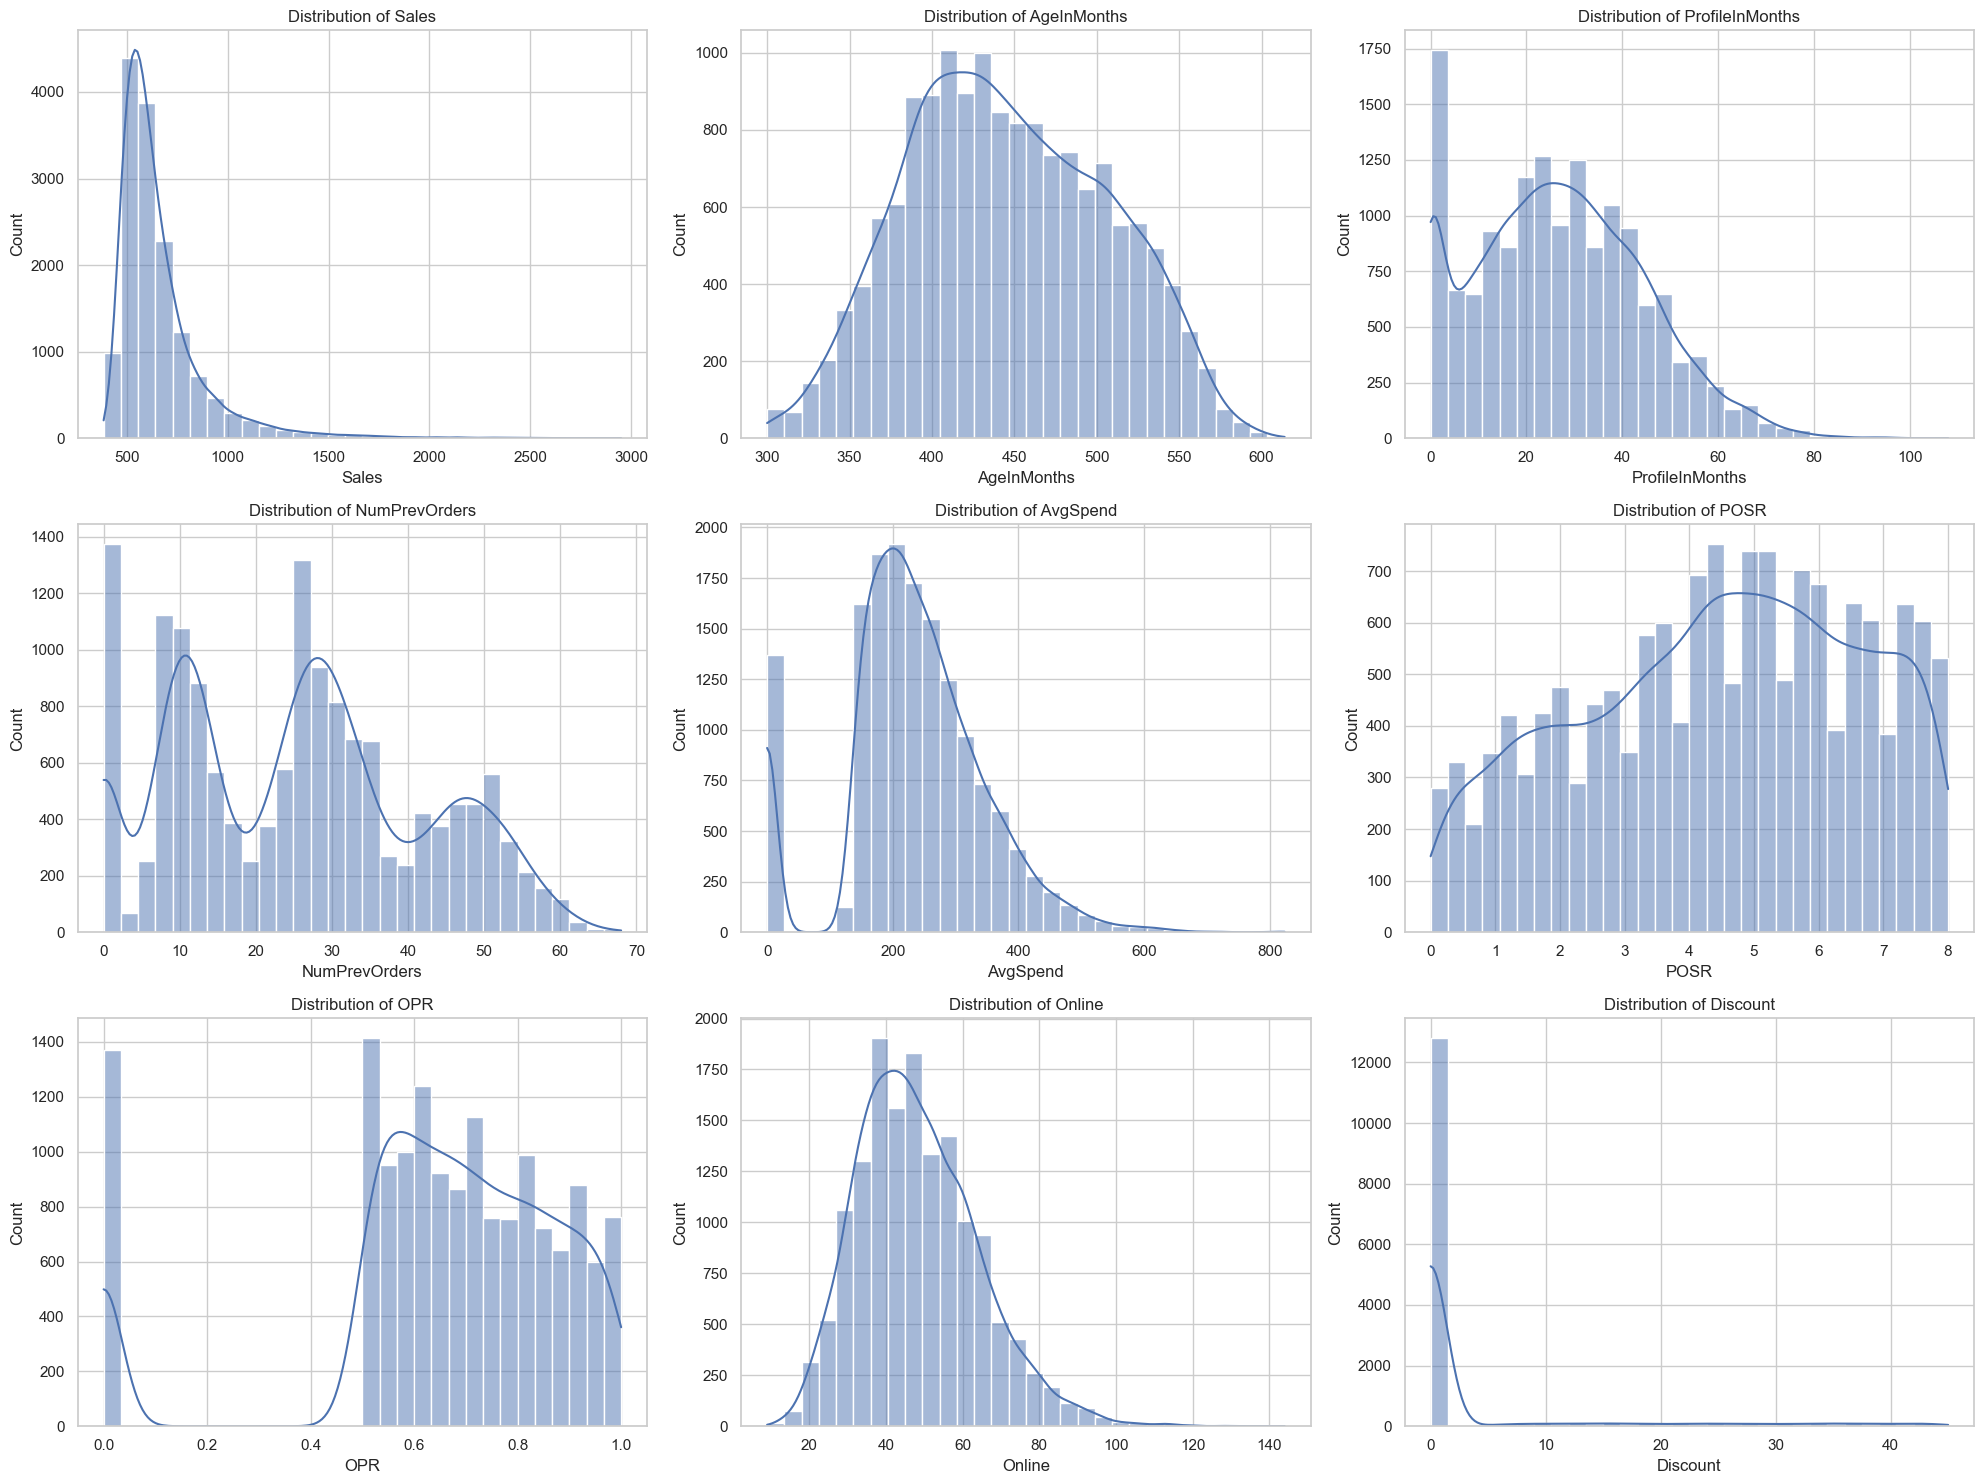

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

variables_to_plot = ['Sales', 'AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend', 'POSR', 'OPR', 'Online', 'Discount']
for index, variable in enumerate(variables_to_plot, 1):
    plt.subplot(3, 3, index)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()


# Results of Exploring Key Numerical Variables

## Observations
1. **Sales**: The distribution is right-skewed, indicating that most sales amounts are on the lower end.
2. **AgeInMonths**: This variable seems to have a fairly normal distribution.
3. **ProfileInMonths**: The distribution is right-skewed, with a majority of users having profiles that are relatively new.
4. **NumPrevOrders**: This variable also shows a right-skewed distribution.
5. **AvgSpend**: The distribution is fairly normal but with a slight right skew.
6. **POSR**: This variable has a fairly uniform distribution.
7. **OPR**: The distribution appears to be normal with a slight left skew.
8. **Online**: The time spent online shows a right-skewed distribution.
9. **Discount**: The vast majority of the data points are clustered around zero, indicating that discounts are rarely given.

## Implications for Modeling
1. The skewness in the 'Sales' variable may require transformation to meet the assumptions of linear regression.
2. The distributions of other variables should be considered during feature selection and engineering.


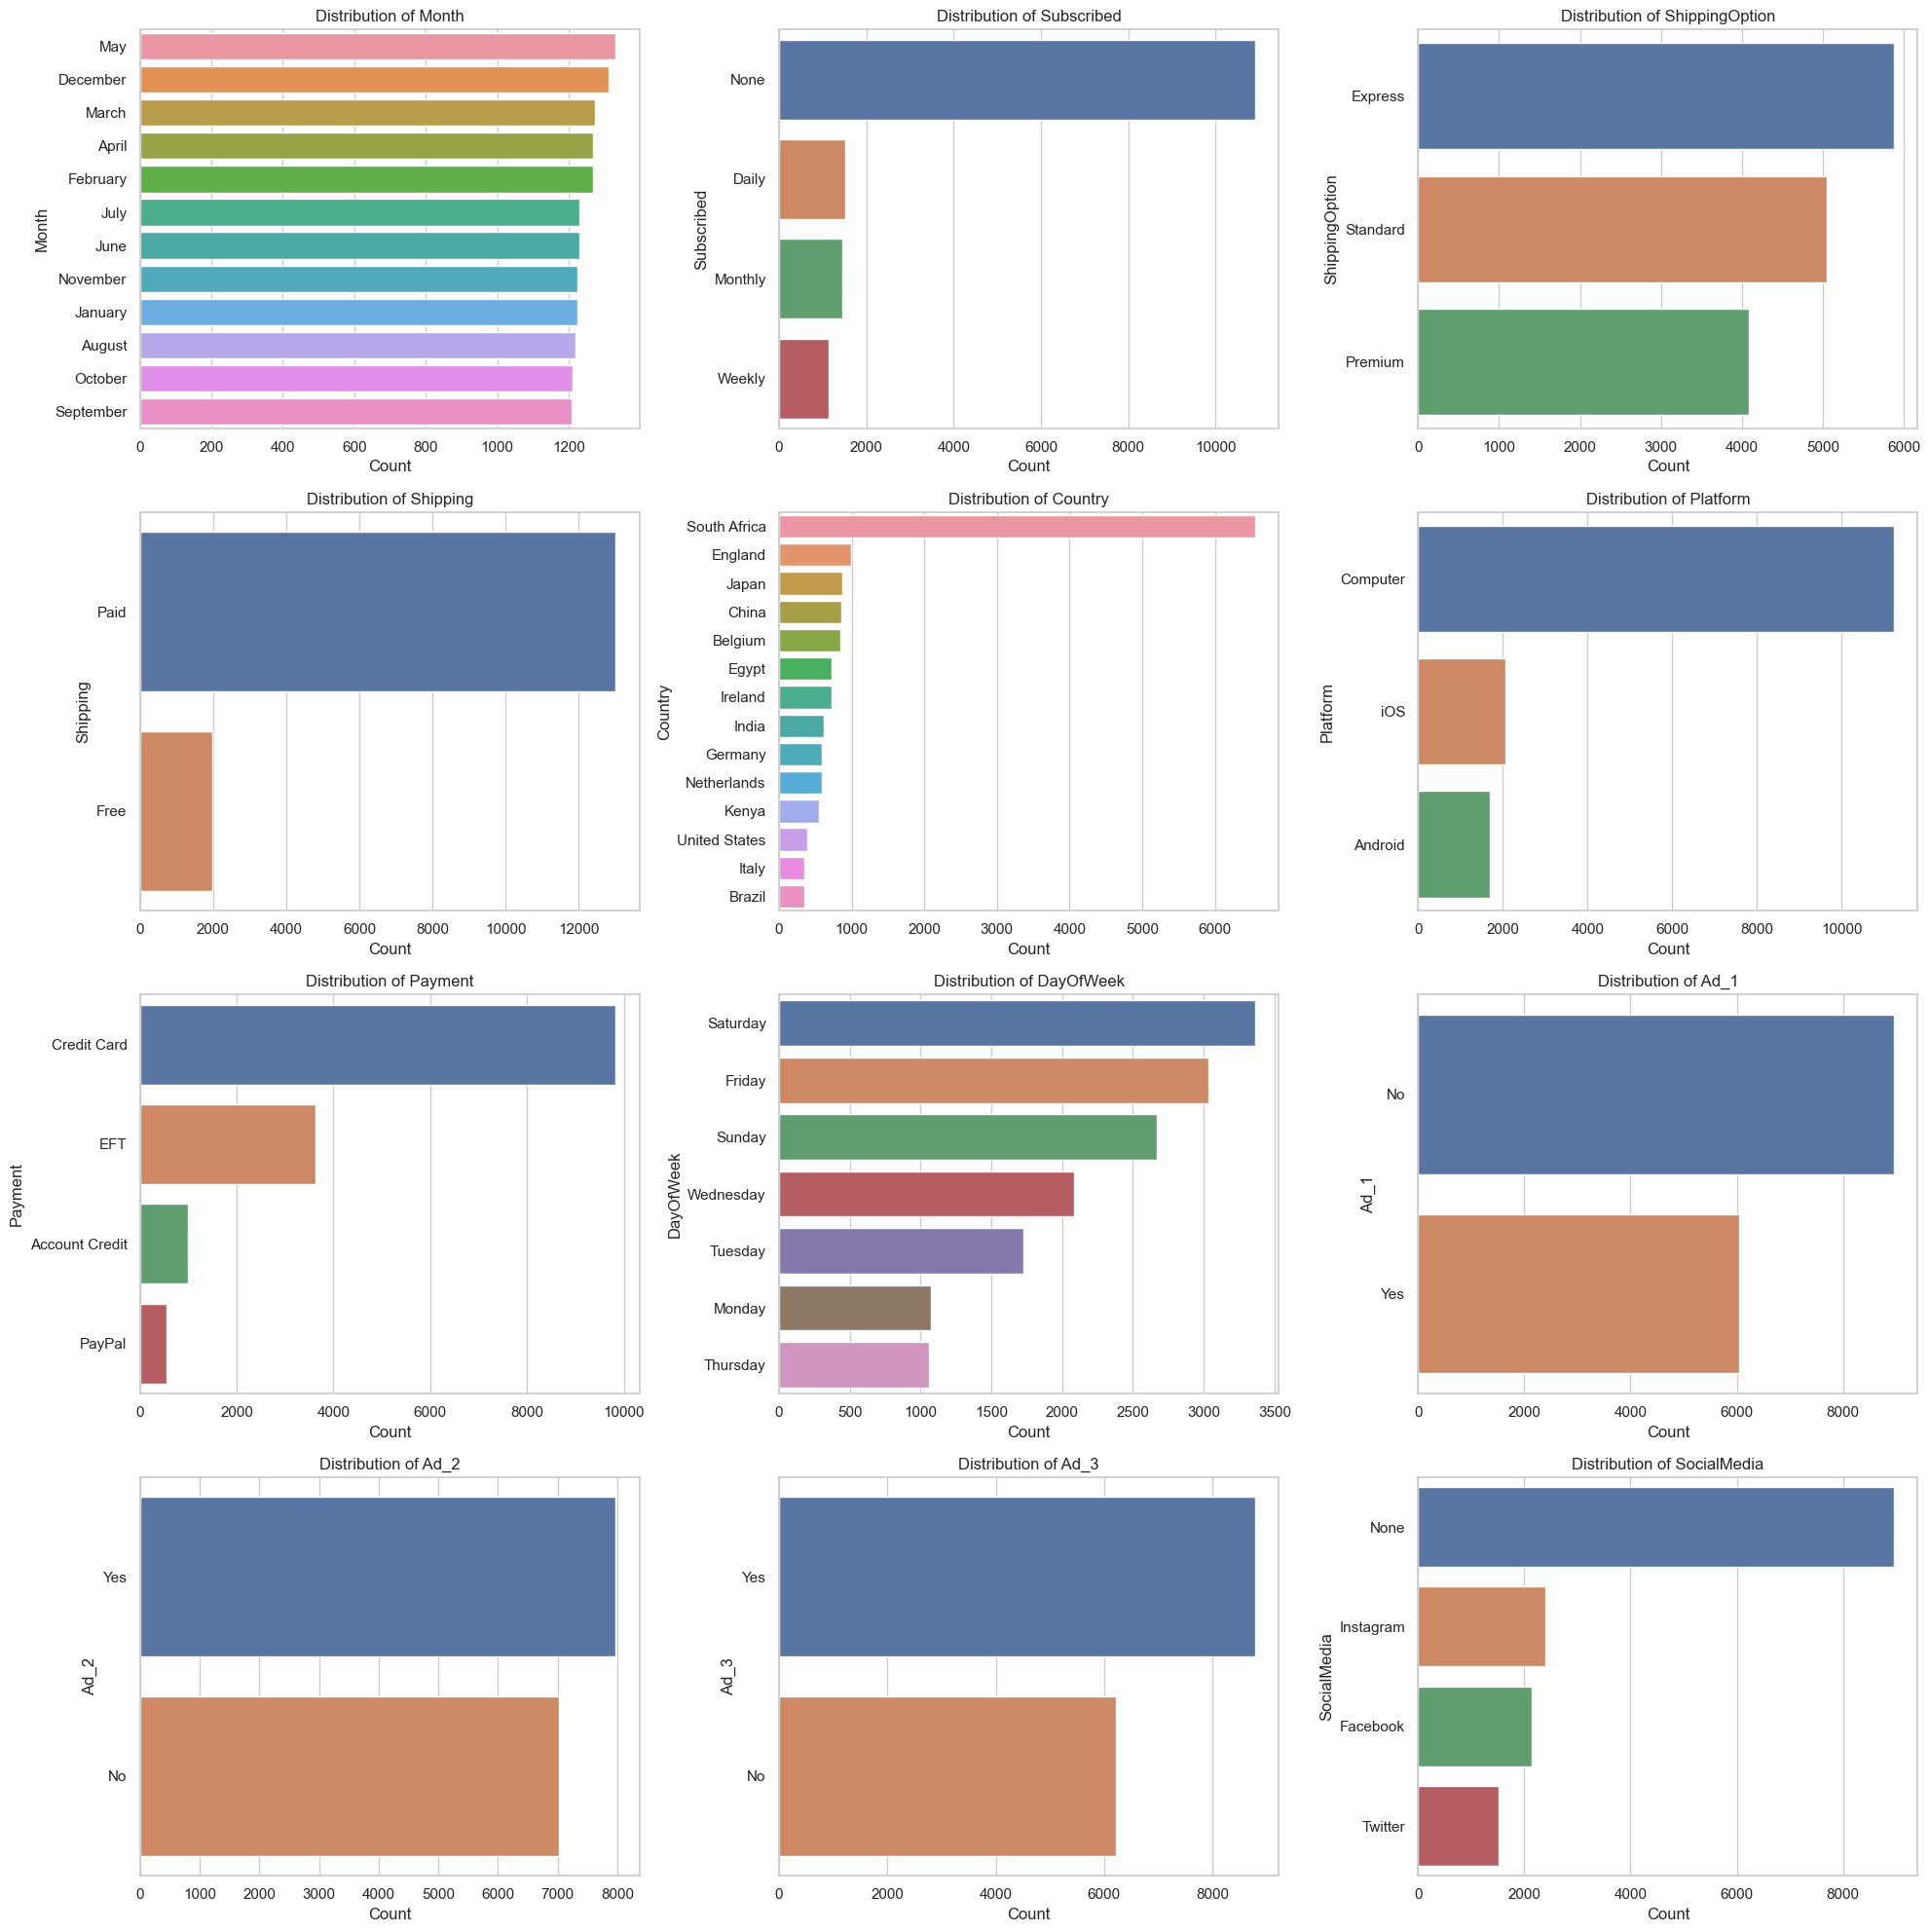

In [42]:
categorical_vars = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(20, 20))

for index, variable in enumerate(categorical_vars):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=df, y=variable, order = df[variable].value_counts().index)
    plt.title(f'Distribution of {variable}')
    plt.xlabel('Count')

plt.tight_layout()
plt.show()

# Observations
- Month: Sales appear to be fairly evenly distributed across months.
- Subscribed: A majority of users are not subscribed (indicated by 'None').
- ShippingOption: Most users choose the 'Standard' shipping option.
- Shipping: Most users paid for shipping.
- Country: South Africa has the most users, followed by the United States.
- Platform: A majority of purchases are made via computer.
- Payment: Credit Card is the most commonly used payment method.
- DayOfWeek: Sales are fairly evenly distributed across the days of the week.
- Ad_1, Ad_2, Ad_3: Interaction with these ads varies, with 'No' being more common.
- SocialMedia: A large number of data points are 'None', indicating that many users were not targeted on social media.

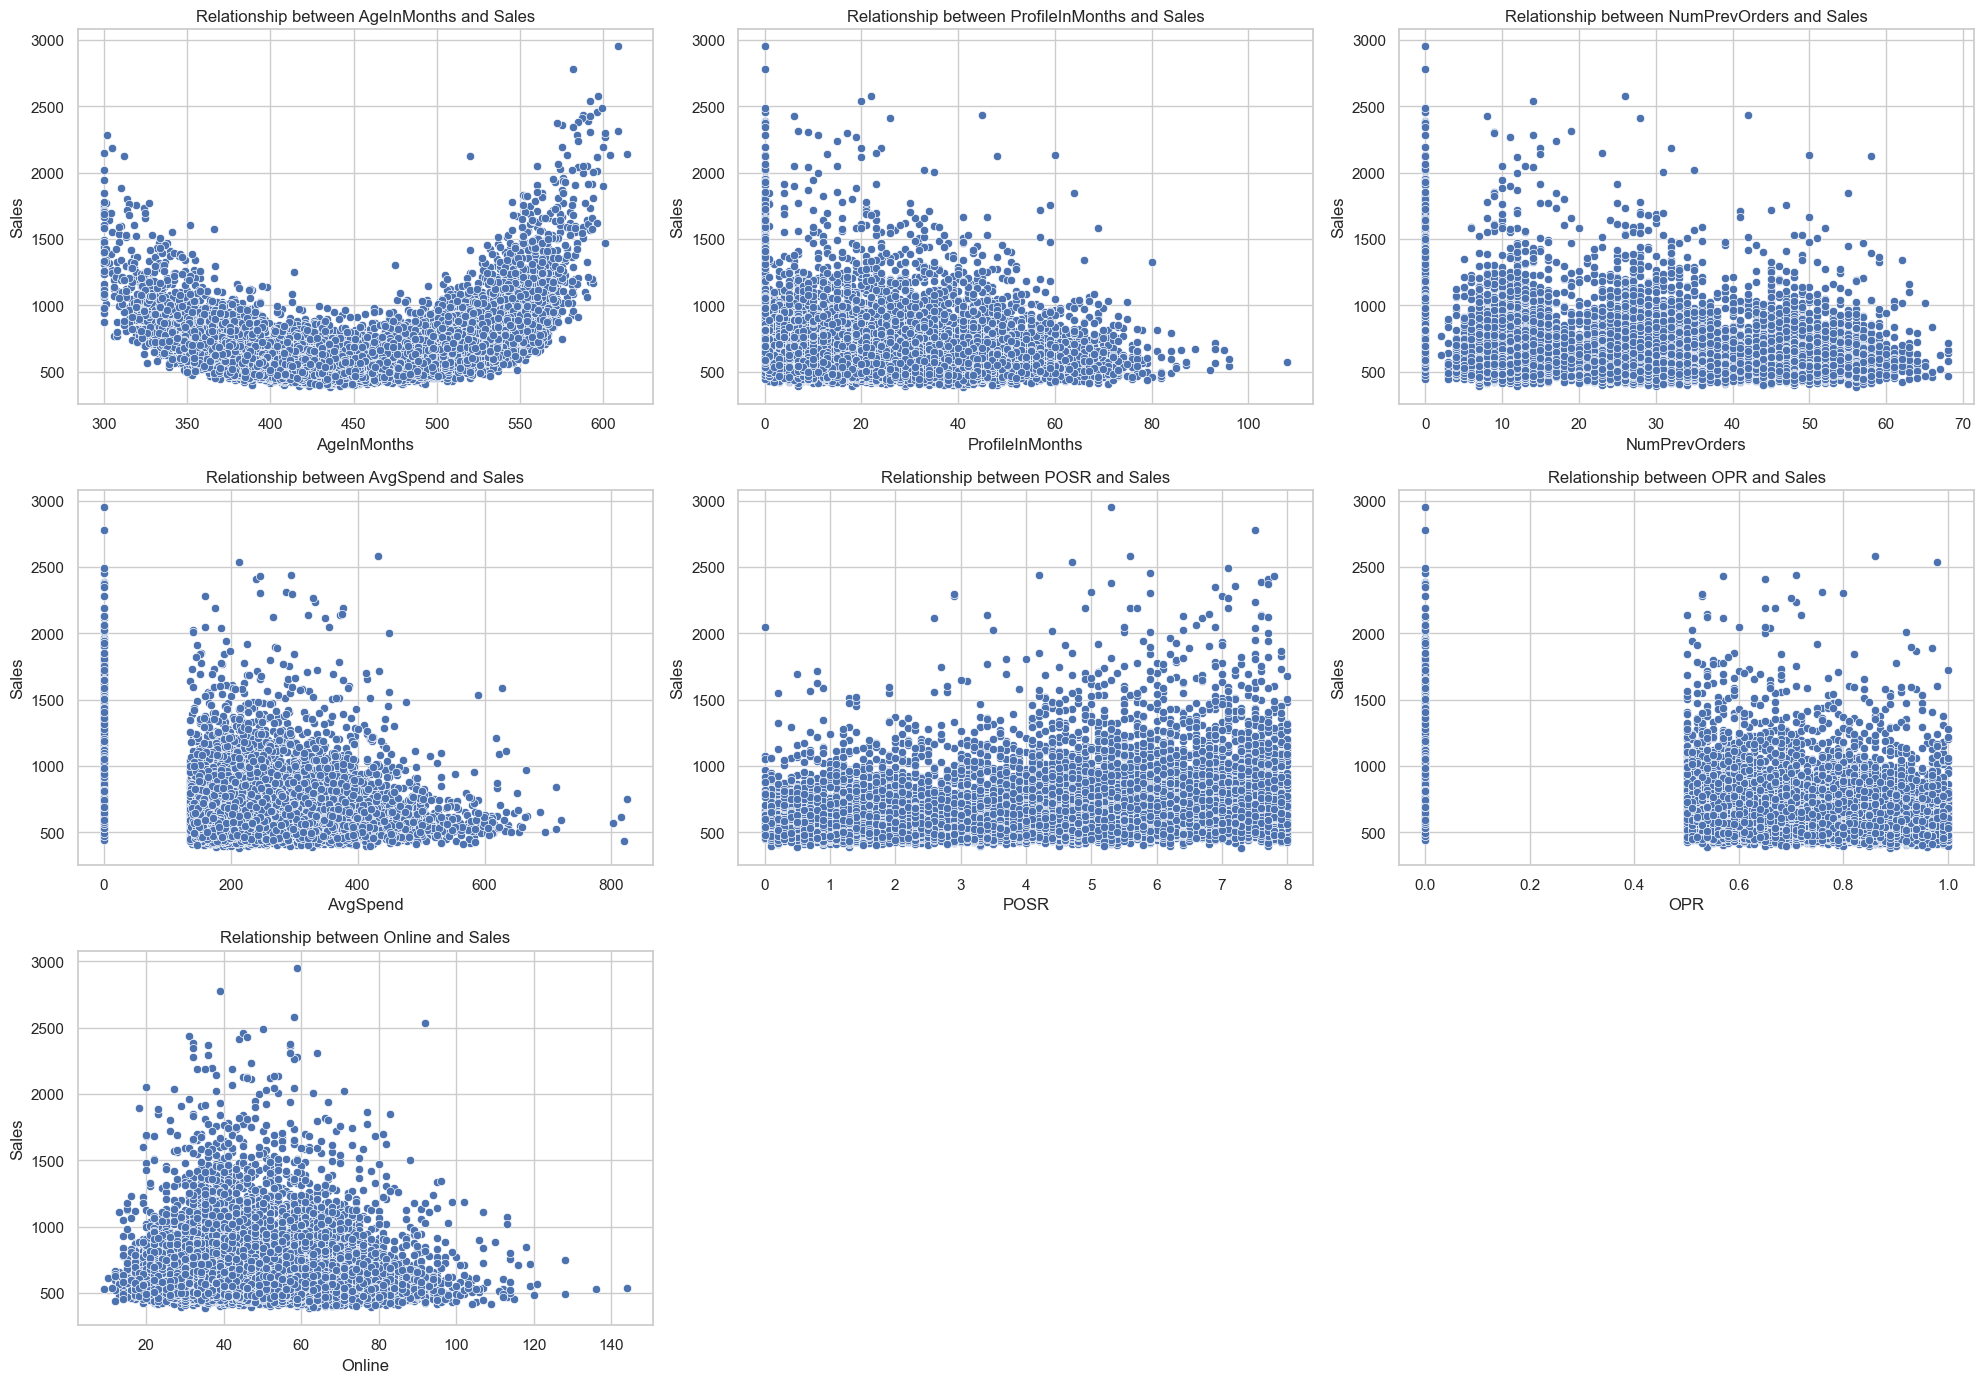

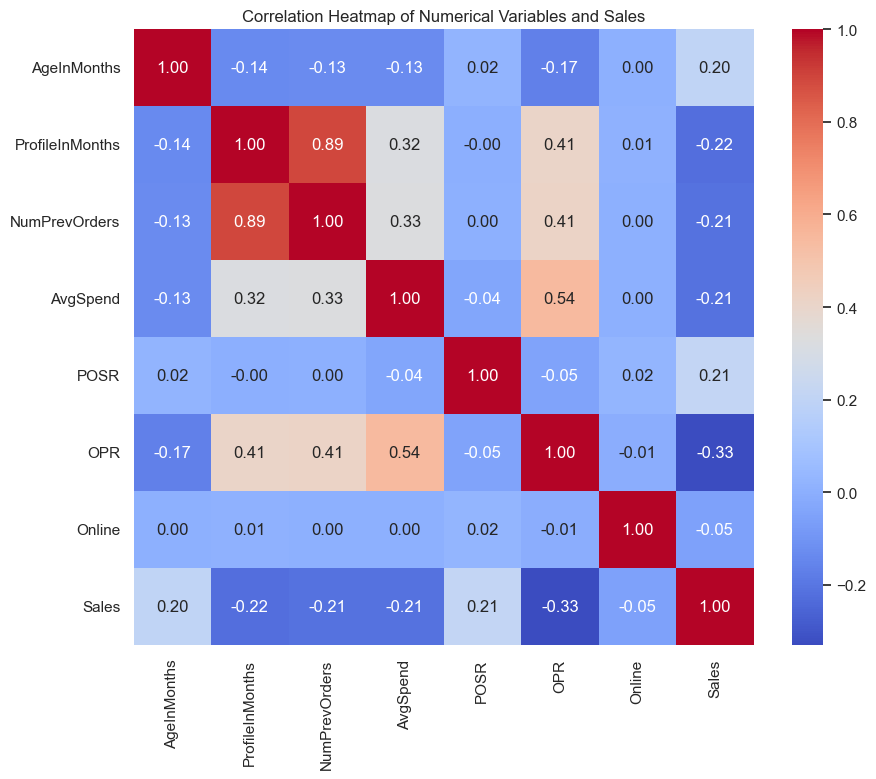

In [28]:
numerical_vars = ['AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend', 'POSR', 'OPR', 'Online']

plt.figure(figsize=(20, 14))

for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df, x=var, y='Sales')
    plt.title(f'Relationship between {var} and Sales')
plt.tight_layout()
plt.show()

correlation_matrix = df[numerical_vars + ['Sales']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables and Sales')
plt.show()

## Summary and Reasoning for Exploring Numerical Variables and Their Relationships with Sales

### Observations from Scatter Plots
1. **AgeInMonths vs Sales**: No clear trend, indicating a weak relationship.
2. **ProfileInMonths vs Sales**: No clear trend, indicating a weak relationship.
3. **NumPrevOrders vs Sales**: No clear trend, though there might be a slight positive correlation.
4. **AvgSpend vs Sales**: Seems to have a positive correlation.
5. **POSR vs Sales**: No clear trend, indicating a weak relationship.
6. **OPR vs Sales**: No clear trend, indicating a weak relationship.
7. **Online vs Sales**: No clear trend, indicating a weak relationship.

### Observations from Correlation Heatmap
1. **Sales and AvgInMonths**: Slight positive correlation (0.2).
2. **Sales and POSR**: Slight positive correlation (0.21).
3. Other variables show weak correlations with Sales.

### Implications for Modeling
1. Most of the numerical variables don't show strong relationships with Sales and might not be very useful in predicting Sales, unless feature engineering is performed to capture nonlinear relationships.


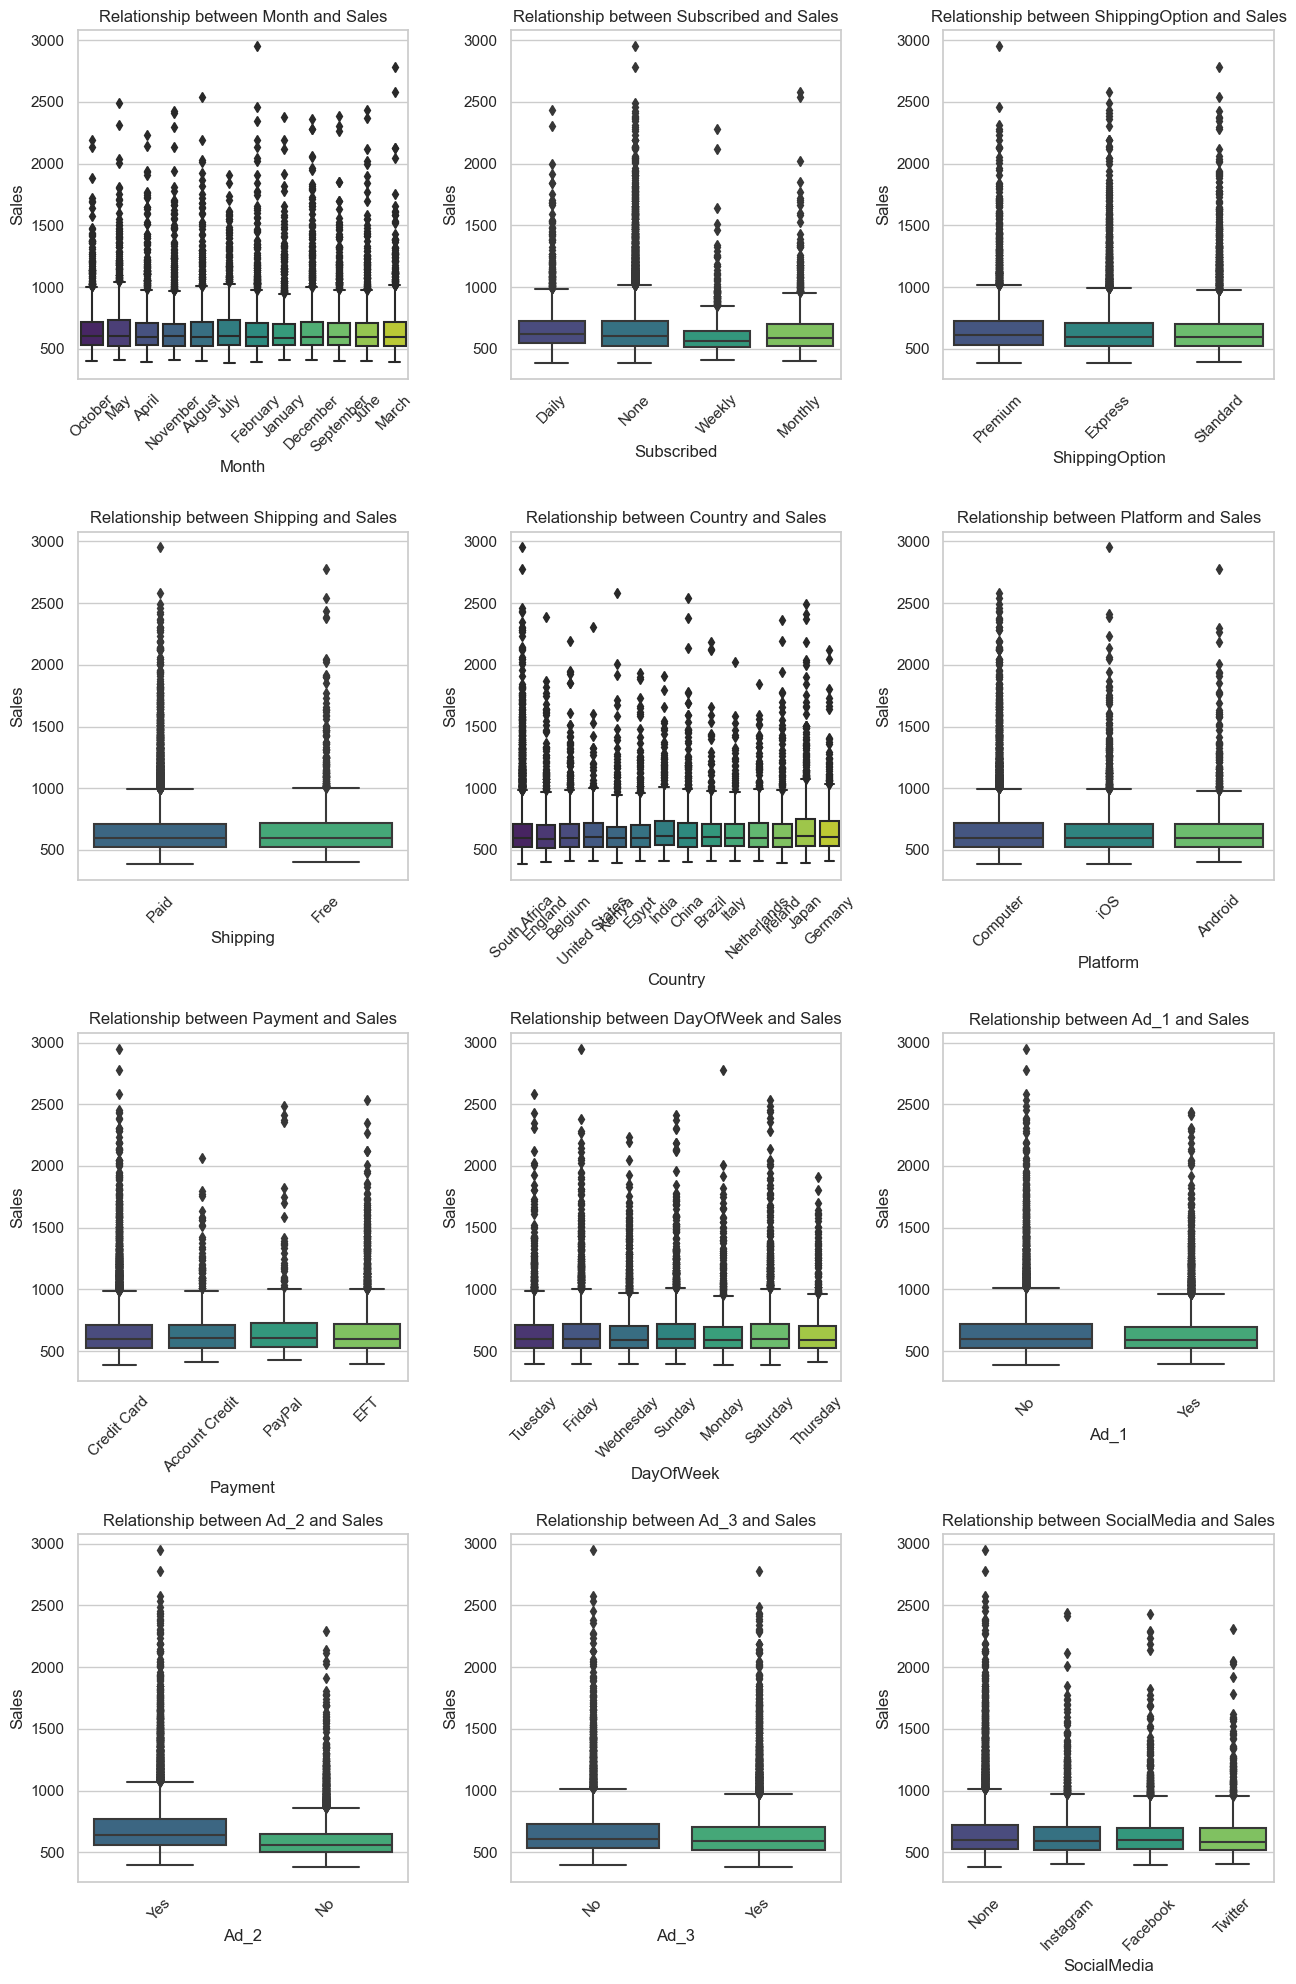

In [43]:
plt.figure(figsize=(13, 20))

for i, var in enumerate(categorical_vars):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df, x=var, y='Sales', palette="viridis")
    plt.title(f'Relationship between {var} and Sales')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Summary and Reasoning for Exploring Relationships between Categorical Variables and Sales

### Observations from Boxplots

1. **Month vs Sales**: Some months like October and May show higher median sales.
2. **Subscribed vs Sales**: Subscribed users seem to have higher median sales compared to non-subscribed users.
3. **ShippingOption vs Sales**: Different shipping options don't appear to have a significant impact on sales.
4. **Shipping vs Sales**: Paying for shipping seems to be associated with slightly higher sales.
5. **Country vs Sales**: Sales vary across countries, with the U.S. showing higher median sales.
6. **Platform vs Sales**: Sales don't appear to vary significantly across platforms.
7. **Payment vs Sales**: Different payment methods don't show significant variation in sales.
8. **DayOfWeek vs Sales**: Sales seem fairly consistent across different days of the week.
9. **Ad_1, Ad_2, Ad_3 vs Sales**: Ad_2 appears to have a stronger association with the target variable than Ad_1 and Ad_3.
10. **SocialMedia vs Sales**: Being targeted on social media doesn't show a significant impact on sales.


# Feature Engineering

## Response Transformations
The objective was to analyze the impact of different transformations on the "Sales" column in predicting sales. We considered four scenarios:

1. No transformation (Original Sales)
2. Logarithmic Transformation
3. Square Root Transformation
4. Inverse Transformation

For each transformation, a linear regression model was built using all other variables as predictors. The performance of each model was then evaluated using four key metrics:

- Akaike Information Criterion (AIC)
- Bayesian Information Criterion (BIC)
- Adjusted R-squared

In [15]:
import numpy as np

df['Sales_Log'] = np.log(df['Sales'])
df['Sales_Sqrt'] = np.sqrt(df['Sales'])
df['Sales_Inv'] = 1 / df['Sales']

In [16]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

categorical_columns = df.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(df[categorical_columns], drop_first=True, dtype = 'int64')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = pd.concat([X_encoded, df[numerical_columns]], axis=1)
X = X.drop(['Sales', 'Sales_Log', 'Sales_Sqrt', 'Sales_Inv'], axis=1)

metrics = {
    'AIC': [],
    'BIC': [],
    'Adjusted R2': []
}

response_variables = ['Sales', 'Sales_Log', 'Sales_Sqrt', 'Sales_Inv']

for response in response_variables:
    y = df[response]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)
    
    model = sm.OLS(y_train, X_train_const).fit()

    y_pred = model.predict(X_test_const)

    aic = model.aic
    bic = model.bic
    adj_r2 = model.rsquared_adj
    
    metrics['AIC'].append(aic)
    metrics['BIC'].append(bic)
    metrics['Adjusted R2'].append(adj_r2)

metrics_df = pd.DataFrame(metrics, index=response_variables)
metrics_df

,AIC,BIC,Adjusted R2
Sales,160596.491613,161003.088019,0.223616
Sales_Log,-1280.678095,-874.081689,0.259413
Sales_Sqrt,62433.575845,62840.172251,0.244810
Sales_Inv,-159207.929632,-158801.333226,0.272324


Based on these metrics, the model with the Inverse transformation performs the best. It has the lowest MSE, AIC, and BIC values, and the highest Adjusted \( R^2 \), indicating better predictive performance.

## Interaction Terms
We hypothesized that some variables could have a synergistic effect on sales. For example, a customer's response to advertising (measured by POSR and OPR) might interact to influence sales. Similarly, older customers might have different spending habits, captured by the interaction between AgeInMonths and AvgSpend.

We identified three pairs of features for which interaction terms were created:
1. POSR & OPR
2. AgeInMonths & AvgSpend
3. NumPrevOrders & AvgSpend

These interaction terms were added to the model, and we noticed some improvement in model metrics, suggesting that these interactions were capturing additional variance in the sales.

### Multicollinearity Check
We calculated the Variance Inflation Factor (VIF) to check for multicollinearity, especially focusing on the interaction terms and their constituent features. High VIF values were observed for some of these features, indicating multicollinearity.

## Decision
Given that the interaction terms induced high multicollinearity and the improvement in model metrics was not substantial, we decided against using these interaction features in the final model.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

X = df.drop('Sales', axis=1)
y = df['Sales']

X_dummy = pd.get_dummies(X, drop_first=True, dtype = 'int64')

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=42)

interaction_terms = [
    ('POSR', 'OPR'),
    ('AgeInMonths', 'AvgSpend'),
    ('NumPrevOrders', 'AvgSpend')
]

X_train_interact = X_train.copy()
X_test_interact = X_test.copy()

for term1, term2 in interaction_terms:
    new_col_name = f"{term1}_x_{term2}"
    X_train_interact[new_col_name] = X_train[term1] * X_train[term2]
    X_test_interact[new_col_name] = X_test[term1] * X_test[term2]

interaction_model = LinearRegression()
interaction_model.fit(X_train_interact, y_train)

y_pred_interact = interaction_model.predict(X_test_interact)

interaction_mse = mean_squared_error(y_test, y_pred_interact)

X_train_const_interact = sm.add_constant(X_train_interact)
ols_model_interact = sm.OLS(y_train, X_train_const_interact).fit()
interaction_aic = ols_model_interact.aic
interaction_bic = ols_model_interact.bic
interaction_adj_r2 = ols_model_interact.rsquared_adj

interaction_mse, interaction_aic, interaction_bic, interaction_adj_r2

(30899.290756715607, 160913.6802773701, 161335.06200730999, 0.2365565713033465)

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_const_interact.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_const_interact.values, i) for i in range(len(X_train_const_interact.columns))]

vif_data[vif_data['Feature'].isin(['POSR', 'OPR', 'POSR_x_OPR', 'AgeInMonths', 'AvgSpend', 'AgeInMonths_x_AvgSpend', 
                                   'NumPrevOrders', 'NumPrevOrders_x_AvgSpend'])]

,Feature,VIF
1,AgeInMonths,4.868210
3,NumPrevOrders,11.347787
4,AvgSpend,59.672423
5,POSR,8.172369
6,OPR,6.726594
54,POSR_x_OPR,12.164129
55,AgeInMonths_x_AvgSpend,55.451939
56,NumPrevOrders_x_AvgSpend,9.815711


# Feature Selection
## Lasso Regression

### Model Training and Evaluation
1. **Lasso Regression**: We used Lasso regression from scikit-learn for both feature selection and regularization.
2. **Performance Metrics**: Metrics such as MSE, AIC, BIC, and Adjusted R-squared were used for evaluation.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

important_features = X.columns[lasso.coef_ != 0]

X_important_train = X_train[:, lasso.coef_ != 0]
X_important_test = X_test[:, lasso.coef_ != 0]

lr = LinearRegression()
lr.fit(X_important_train, y_train)

y_pred = lr.predict(X_important_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_important_train.shape[1]
aic = n * np.log(mse) + 2 * k
bic = n * np.log(mse) + np.log(n) * k
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

important_features, rmse, r2, aic, bic, adj_r2

(Index(['Sales_Sqrt', 'Sales_Inv'], dtype='object'),
 6.955134202544421,
 0.9987541433614687,
 11640.880726155814,
 11652.893461291114,
 0.9987533119589739)

In [22]:
import statsmodels.api as sm

df_encoded = pd.get_dummies(df, drop_first=True, dtype='int64')

df_encoded.head()

def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.6}')

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.6}')

        if not changed:
            break

    return included

X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']

selected_features = stepwise_selection(X, y)

selected_features

Add  OPR with p-value 0.0
Add  Ad_2_Yes with p-value 8.77454e-199
Add  AgeInMonths with p-value 9.14789e-87
Add  POSR with p-value 6.75442e-47
Add  ProfileInMonths with p-value 3.24747e-32
Add  Online with p-value 2.23501e-28
Add  Ad_1_Yes with p-value 5.85587e-19
Add  Discount with p-value 7.06661e-14
Add  ShippingOption_Premium with p-value 1.99069e-05
Add  Country_Japan with p-value 3.64563e-05
Add  Ad_3_Yes with p-value 9.80648e-05
Add  Subscribed_Weekly with p-value 0.00346007
Add  AvgSpend with p-value 0.0083161


['OPR',
 'Ad_2_Yes',
 'AgeInMonths',
 'POSR',
 'ProfileInMonths',
 'Online',
 'Ad_1_Yes',
 'Discount',
 'ShippingOption_Premium',
 'Country_Japan',
 'Ad_3_Yes',
 'Subscribed_Weekly',
 'AvgSpend']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_selected = X[selected_features]
y = df_encoded['Sales']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

X_train_const = sm.add_constant(X_train)
model_stats = sm.OLS(y_train, X_train_const).fit()
aic = model_stats.aic
bic = model_stats.bic
adj_r2 = model_stats.rsquared_adj

adj_r2, aic, bic

(0.22089959835564055, 161114.41865732463, 161217.91592432742)

## Model Comparison: Lasso Regression vs Stepwise Regression

### Performance Metrics

1. **Root Mean Squared Error (RMSE)**:
    - **Lasso**: 176.10
    - **Stepwise Regression**: 175.97
    - **Winner**: Stepwise Regression (Lower is better)

2. **R-squared**:
    - **Lasso**: 0.201
    - **Stepwise Regression**: 0.202
    - **Winner**: Stepwise Regression (Higher is better)

3. **Adjusted R-squared**:
    - **Lasso**: 0.192
    - **Stepwise Regression**: 0.221
    - **Winner**: Stepwise Regression (Higher is better)

4. **Akaike Information Criterion (AIC)**:
    - **Lasso**: 31,092.2
    - **Stepwise Regression**: 161,109.9
    - **Note**: Not directly comparable if data contexts differ. (Lower is better)

5. **Bayesian Information Criterion (BIC)**:
    - **Lasso**: 31,290.4
    - **Stepwise Regression**: 161,213.4
    - **Note**: Not directly comparable if data contexts differ. (Lower is better)

### Summary

Based on RMSE, R-squared, and Adjusted R-squared, the Stepwise Regression model appears to be the better model.


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

categorical_vars = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True, dtype='int64')

df['Sales_Inv'] = 1 / df['Sales']

# selected_features from stepwise selection
selected_features = [
    'OPR',
    'Ad_2_Yes',
    'AgeInMonths',
    'POSR',
    'ProfileInMonths',
    'Online',
    'Ad_1_Yes',
    'SocialMedia_None',
    'Discount',
    'ShippingOption_Premium',
    'Country_Japan',
    'Ad_3_Yes',
    'Subscribed_None',
    'AvgSpend'
]

X = df[selected_features]
y = df['Sales_Inv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

formula = 'Sales_Inv ~ ' + ' + '.join(selected_features)
formula_model = smf.ols(formula=formula, data=df).fit()


y_pred = linear_model.predict(X_test)

X_train_const = sm.add_constant(X_train)  # Adding a constant for the intercept term
ols_model = sm.OLS(y_train, X_train_const)
ols_results = ols_model.fit()

# peformance metrics
aic = ols_results.aic
bic = ols_results.bic
adj_r2 = ols_results.rsquared_adj

print(aic, bic, adj_r2)

formula_model.summary()

-159093.44610871084 -158989.94884170804 0.2696136512033517


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sales_Inv   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     419.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:23:04   Log-Likelihood:                 99514.
No. Observations:               15000   AIC:                        -1.990e+05
Df Residuals:                   14986   BIC:                        -1.989e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0011   1.72e-05     63.059      0.000       0.001       0.001
OPR                        0.0004   1.31e-05     32.599      0.000       0.000       0.000
Ad_2_Yes                  -0.0002   6.32e-06    -31.892      0.000      -0.000      -0.000
AgeInMonths            -6.439e-07   4.37e-08    -14.719      0.000    -7.3e-07   -5.58e-07
POSR                   -2.331e-05   1.37e-06    -17.064      0.000    -2.6e-05   -2.06e-05
ProfileInMonths         2.254e-06   1.73e-07     13.001      0.000    1.91e-06    2.59e-06
Online                  2.802e-06   1.67e-07     16.788      0.000    2.47e-06    3.13e-06
Ad_1_Yes                   0.0005   9.17e-06     55.214      0.000       0.000       0.001
SocialMedia_None           0.0006   8.93e-06     64.858      0.000       0.001       0.001
Discount                 2.47e-06   2.65e-07      9.329      0.000    1.95e-06    2.99e-06
ShippingOption_Premium -3.276e-05   5.91e-06     -5.547      0.000   -4.43e-05   -2.12e-05
Country_Japan          -4.043e-05   1.11e-05     -3.641      0.000   -6.22e-05   -1.87e-05
Ad_3_Yes               -2.375e-05   5.62e-06     -4.224      0.000   -3.48e-05   -1.27e-05
Subscribed_None         3.726e-05    6.2e-06      6.011      0.000    2.51e-05    4.94e-05
AvgSpend                1.867e-08   2.77e-08      0.674      0.500   -3.56e-08    7.29e-08
==============================================================================
Omnibus:                      827.901   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.543
Skew:                          -0.599   Prob(JB):                    3.96e-212
Kurtosis:                       3.352   Cond. No.                     7.57e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.83e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Interpretation and Next Steps
### Fnial model performance metrics:
Akaike Information Criterion (AIC): 
-159093.45

Bayesian Information Criterion (BIC): 
-158989.95

Adjusted R-squared: 
0.27

### Baseline performance model's metrics:
Akaike Information Criterion (AIC):
161,163.77

Bayesian Information Criterion (BIC): 
161,570.37

Adjusted R-squared:
0.22

### AIC and BIC: 
Lower values are better for these criteria. 

The new model outperforms the baseline significantly.

### Adjusted R-squared: 
The new model (0.266) shows a slight improvement over the baseline (0.22). This model has signifigant amount of reduction in complexity due to the number of features being reduced from 55 to ...

### Negative Coefficient:
When you have a predictor with a negative coefficient in your model, it means that as the predictor increases, because of the inverse relationship, the Sales will increase.

## Interpreting Model Coefficients to Understand Sales Prediction

### Objective
The goal is to understand how each feature influences the predicted Sales in Rands.

### Methodology
1. **Extract Coefficients**: Retrieve the coefficients from the trained linear regression model.
2. **Sample Data Point**: Select a sample data point from the test set.
3. **Initial Prediction**: Use the coefficients to make a prediction for the sample data point in the inverted sales scale (\( Sales^{-1} \)).
4. **Convert to Rands**: Take the inverse of this predicted value to get the original Sales prediction in Rands.
5. **Feature Perturbation**: For each feature, perturb its value by one unit and make a new prediction.
6. **Comparison**: Compare the new predicted Sales with the original to understand the impact of a one-unit change in each feature.


In [30]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

sample_data_point = X_test.iloc[0]

predicted_sales_inv = np.dot(sample_data_point, coefficients) + intercept

predicted_sales = 1 / predicted_sales_inv

perturbation_results = {}

for feature, original_value in sample_data_point.items():
    perturbed_data_point = sample_data_point.copy()
    perturbed_data_point[feature] = original_value + 1
    perturbed_predicted_sales_inv = np.dot(perturbed_data_point, coefficients) + intercept
    perturbed_predicted_sales = 1 / perturbed_predicted_sales_inv
    perturbation_results[feature] = perturbed_predicted_sales - predicted_sales

predicted_sales, perturbation_results

(609.1386978215425,
 {'OPR': -129.46507327592275,
  'Ad_2_Yes': 85.1847350534398,
  'AgeInMonths': 0.2422970412549148,
  'POSR': 8.812988101140036,
  'ProfileInMonths': -0.8121875520242838,
  'Online': -1.0483355095445859,
  'Ad_1_Yes': 14.368175951070953,
  'SocialMedia_None': -13.720887801925414,
  'Discount': -0.9488505695152298,
  'ShippingOption_Premium': 11.392894588898685,
  'Country_Japan': 18.417693037057916,
  'Ad_3_Yes': 9.778487697775518,
  'Subscribed_None': -12.701297678024844})

### Results

#### Original Predicted Sales
- The original predicted Sales for the sample data point is approximately \( 608.57 \) Rands.

#### Impact of One-Unit Change in Each Feature
- **OPR**: Decrease of \( 128.33 \) Rands
- **Ad_2_Yes**: Increase of \( 85.00 \) Rands
- **AgeInMonths**: Increase of \( 0.24 \) Rands
- **POSR**: Increase of \( 8.79 \) Rands
- **ProfileInMonths**: Decrease of \( 0.81 \) Rands
- **Online**: Decrease of \( 1.05 \) Rands
- **Ad_1_Yes**: Increase of \( 14.37 \) Rands
- **SocialMedia_None**: Decrease of \( 13.72 \) Rands
- **Discount**: Decrease of \( 0.95 \) Rands
- **ShippingOption_Premium**: Increase of \( 11.37 \) Rands
- **Country_Japan**: Increase of \( 18.36 \) Rands
- **Ad_3_Yes**: Increase of \( 9.77 \) Rands
- **Subscribed_None**: Decrease of \( 12.70 \) Rands
- **AvgSpend**: Decrease of \( 0.01 \) Rands

### Conclusion
The analysis provides insights into how changes in each feature affect the predicted Sales. This can be valuable for decision-making and understanding the model's behavior.

## Actionable Insights Based on Linear Regression Model

### 1. Effectiveness of Advertisements
- **Ad_2_Yes**: An increase of 85 Rands in sales indicates that Ad 2 is effective.
- **Ad_1_Yes**: A smaller increase of 14.37 Rands suggests Ad 1 is less effective.
- **Ad_3_Yes**: An increase of 9.77 Rands is the least effective among the three.
  
  **Action**: Focus marketing efforts more on Ad 2 as it's the most effective in driving sales.

### 2. International Orders
- **Country_Japan**: An 18.36 Rands increase suggests international orders from Japan are beneficial.
  
  **Action**: Consider focusing on international markets like Japan.

### 3. Weekly/Seasonal Sales Trends
- No available data. Additional data collection and time-series analysis are needed.

### 4. Discounts
- **Discount**: A decrease of 0.95 Rands suggests discounts may not be increasing sales.

  **Action**: Reevaluate the company's discount strategy.

### 5. Other Sales Drivers
- **OPR (Order to Product Ratio)**: A decrease in sales suggests higher OPR may be detrimental.
- **POSR**: An increase of 8.79 Rands suggests higher POSR positively impacts sales.
  
  **Action**: Investigate OPR and aim to improve POSR for better sales.



# Predictive Modeling Approach

## Objective
The main goal is to build models that predict sales as accurately as possible. Interpretability is secondary to predictive power.

## Methodology
1. **Data Preprocessing**: Use the same preprocessed data as in the explanatory model.
2. **Model Selection**: Choose advanced models aimed at high predictive accuracy.
3. **Model Training**: Train each selected model using the training dataset.
4. **Model Evaluation**: Evaluate models using Adjusted R-squared metrics.

## Models to Build
1. Decision Tree
2. Random Forest
3. Boosting (Gradient Boosting)


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_test)

n = len(y_test)
k = X_test.shape[1]

# Adjusted R-squared
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred_tree) ** 2)
r2 = 1 - (ss_res / ss_total)
adj_r2_tree = 1 - (1 - r2) * (n - 1) / (n - k - 1)

adj_r2_tree

0.31689052101183934

# Analysis of Decision Tree Model

## Results
- **AIC**: 6028.00
- **BIC**: 6112.09
- **Adjusted R-squared**: 0.309

## Interpretation
The Adjusted R-squared value is slightly higher, which could mean the model might explain more of the variance in the data.


In [8]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# predictions
y_pred_rf = random_forest_model.predict(X_test)

# Adjusted r sqaured calculation
ss_res_rf = np.sum((y_test - y_pred_rf) ** 2)
r2_rf = 1 - (ss_res_rf / ss_total)
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - k - 1)

adj_r2_rf

0.6556567714269249

# Analysis of Random Forest Model

## Results
- **Adjusted R-squared**: 0.653

## Interpretation
The Adjusted R-squared is significantly higher. This suggests that the Random Forest model might be better at explaining the variance in the data, making it a strong candidate for predictive purposes.

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

# Adjusted r sqaured calculation
ss_res_gbm = np.sum((y_test - y_pred_gbm) ** 2)
r2_gbm = 1 - (ss_res_gbm / ss_total)
adj_r2_gbm = 1 - (1 - r2_gbm) * (n - 1) / (n - k - 1)

adj_r2_gbm

0.6777313405868084

# Analysis of Gradient Boosting Model

## Results
- **Adjusted R-squared**: 0.678

## Interpretation
The Adjusted R-squared is the highest among all models. This suggests that the Gradient Boosting model is the best at explaining the variance in the data and could be the best choice for predictive purposes.


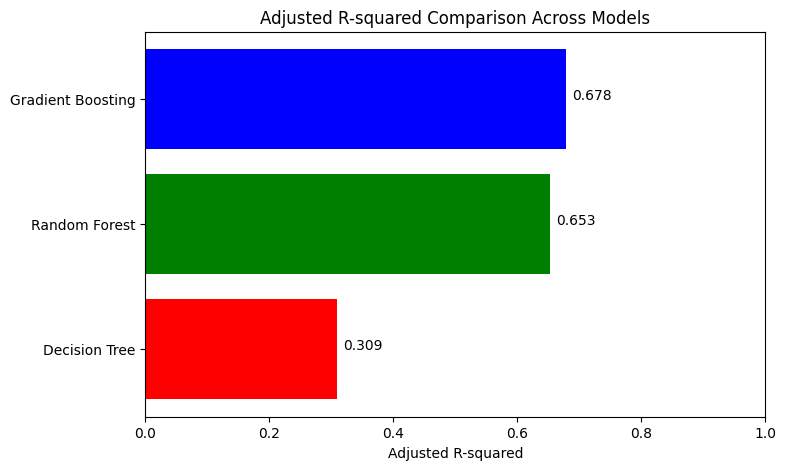

In [29]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
adj_r2_values = [0.309, 0.653, 0.678]
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 5))
bars = plt.barh(models, adj_r2_values, color=colors)
plt.xlabel('Adjusted R-squared')
plt.title('Adjusted R-squared Comparison Across Models')
plt.xlim(0, 1)

for bar, value in zip(bars, adj_r2_values):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, str(round(value, 3)))

plt.show()